In [1]:
import numpy as np
import pandas as pd
Incident=pd.read_csv(r"C:\Users\agrabia\Documents\Formation\Projet/LFB Incident data Last 3 years.csv")
Mobilisation=pd.read_csv(r"C:\Users\agrabia\Documents\Formation\Projet/LFB Mobilisation data Last 3 years.csv", sep=';')

In [2]:
Incident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381366 entries, 0 to 381365
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   IncidentNumber                          381366 non-null  object 
 1   DateOfCall                              381366 non-null  object 
 2   CalYear                                 381366 non-null  int64  
 3   TimeOfCall                              381366 non-null  object 
 4   HourOfCall                              381366 non-null  int64  
 5   IncidentGroup                           381366 non-null  object 
 6   StopCodeDescription                     381366 non-null  object 
 7   SpecialServiceType                      136659 non-null  object 
 8   PropertyCategory                        381366 non-null  object 
 9   PropertyType                            381366 non-null  object 
 10  AddressQualifier                        3813

In [3]:
Mobilisation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560529 entries, 0 to 560528
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   IncidentNumber            560529 non-null  object 
 1   CalYear                   560529 non-null  int64  
 2   HourOfCall                560529 non-null  int64  
 3   ResourceMobilisationId    560529 non-null  int64  
 4   Resource_Code             560529 non-null  object 
 5   PerformanceReporting      560529 non-null  object 
 6   DateAndTimeMobilised      560529 non-null  object 
 7   DateAndTimeMobile         558164 non-null  object 
 8   DateAndTimeArrived        560529 non-null  object 
 9   TurnoutTimeSeconds        558152 non-null  float64
 10  TravelTimeSeconds         558148 non-null  float64
 11  AttendanceTimeSeconds     560529 non-null  int64  
 12  DateAndTimeLeft           560292 non-null  object 
 13  DateAndTimeReturned       0 non-null       f

In [5]:
Mobilisation_1=Mobilisation[Mobilisation['PerformanceReporting']=='1']

In [6]:
Mobilisation_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361082 entries, 0 to 560528
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   IncidentNumber            361082 non-null  object 
 1   CalYear                   361082 non-null  int64  
 2   HourOfCall                361082 non-null  int64  
 3   ResourceMobilisationId    361082 non-null  int64  
 4   Resource_Code             361082 non-null  object 
 5   PerformanceReporting      361082 non-null  object 
 6   DateAndTimeMobilised      361082 non-null  object 
 7   DateAndTimeMobile         359135 non-null  object 
 8   DateAndTimeArrived        361082 non-null  object 
 9   TurnoutTimeSeconds        359129 non-null  float64
 10  TravelTimeSeconds         359121 non-null  float64
 11  AttendanceTimeSeconds     361082 non-null  int64  
 12  DateAndTimeLeft           360920 non-null  object 
 13  DateAndTimeReturned       0 non-null       f

In [7]:
Mobilisation_1.drop(['CalYear','HourOfCall'], axis=1,inplace=True)
Final_1=Incident.merge(right=Mobilisation_1, on='IncidentNumber')
Final_1.info()

C:\Users\agrabia\AppData\Local\Temp\ipykernel_10668\1996949902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mobilisation_1.drop(['CalYear','HourOfCall'], axis=1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 359042 entries, 0 to 359041
Data columns (total 58 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   IncidentNumber                          359042 non-null  object 
 1   DateOfCall                              359042 non-null  object 
 2   CalYear                                 359042 non-null  int64  
 3   TimeOfCall                              359042 non-null  object 
 4   HourOfCall                              359042 non-null  int64  
 5   IncidentGroup                           359042 non-null  object 
 6   StopCodeDescription                     359042 non-null  object 
 7   SpecialServiceType                      116516 non-null  object 
 8   PropertyCategory                        359042 non-null  object 
 9   PropertyType                            359042 non-null  object 
 10  AddressQualifier                        3590

In [8]:
Final_1['DateOfCall_bis'] = pd.to_datetime(Final_1['DateOfCall'])
Final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359042 entries, 0 to 359041
Data columns (total 59 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   IncidentNumber                          359042 non-null  object        
 1   DateOfCall                              359042 non-null  object        
 2   CalYear                                 359042 non-null  int64         
 3   TimeOfCall                              359042 non-null  object        
 4   HourOfCall                              359042 non-null  int64         
 5   IncidentGroup                           359042 non-null  object        
 6   StopCodeDescription                     359042 non-null  object        
 7   SpecialServiceType                      116516 non-null  object        
 8   PropertyCategory                        359042 non-null  object        
 9   PropertyType                         

In [9]:
Final_1.drop(['DateOfCall','DateAndTimeReturned'], axis=1,inplace=True)

In [10]:
def get_minut(date):
    time_decoupe=date.split(':')
    return date.split(':')[1]
Final_1['MinuteOfCall'] = Final_1['TimeOfCall'].apply(get_minut)
Final_1['MinuteOfCall']=Final_1['MinuteOfCall'].astype(int)
Final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359042 entries, 0 to 359041
Data columns (total 58 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   IncidentNumber                          359042 non-null  object        
 1   CalYear                                 359042 non-null  int64         
 2   TimeOfCall                              359042 non-null  object        
 3   HourOfCall                              359042 non-null  int64         
 4   IncidentGroup                           359042 non-null  object        
 5   StopCodeDescription                     359042 non-null  object        
 6   SpecialServiceType                      116516 non-null  object        
 7   PropertyCategory                        359042 non-null  object        
 8   PropertyType                            359042 non-null  object        
 9   AddressQualifier                     

In [11]:
Final_1.drop(['TimeOfCall','DelayCode_Description','UPRN','USRN'], axis=1,inplace=True)
Final_1.drop(['FRS','Latitude','Longitude','PerformanceReporting','Postcode_full','DateAndTimeMobilised',
             'DateAndTimeMobile','DateAndTimeArrived'], axis=1,inplace=True)
Final_1.drop(['PumpOrder','PlusCode_Code','PlusCode_Description','Easting_m','Northing_m'], axis=1,inplace=True)
Final_1.drop(['PumpHoursRoundUp','Notional Cost (£)'], axis=1,inplace=True)
Final_1.drop(['FirstPumpArriving_AttendanceTime','SecondPumpArriving_AttendanceTime',
              'SecondPumpArriving_DeployedFromStation'], axis=1,inplace=True)
Final_1.drop(['PropertyType','SpecialServiceType','Postcode_district','IncGeo_WardCode','IncGeo_WardName',
             'IncGeo_WardNameNew'], axis=1,inplace=True)
Final_1.drop(['IncGeo_BoroughCode','IncGeo_BoroughName'], axis=1,inplace=True)
Final_1.drop(['FirstPumpArriving_DeployedFromStation','DeployedFromStation_Code','DeployedFromLocation'], axis=1,inplace=True)
Final_1.drop(['DateAndTimeLeft'], axis=1,inplace=True)

In [12]:
Final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359042 entries, 0 to 359041
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IncidentNumber                 359042 non-null  object        
 1   CalYear                        359042 non-null  int64         
 2   HourOfCall                     359042 non-null  int64         
 3   IncidentGroup                  359042 non-null  object        
 4   StopCodeDescription            359042 non-null  object        
 5   PropertyCategory               359042 non-null  object        
 6   AddressQualifier               359042 non-null  object        
 7   ProperCase                     359042 non-null  object        
 8   Easting_rounded                359042 non-null  int64         
 9   Northing_rounded               359042 non-null  int64         
 10  IncidentStationGround          359041 non-null  object        
 11  

In [13]:
Final_1['DelayCodeId_bis']=Final_1['DelayCodeId'].fillna(12)
Final_1.drop(['DelayCodeId'], axis=1,inplace=True)

In [14]:
Final_1['AFA']=Final_1['StopCodeDescription'].replace(['AFA','False alarm - Good intent','False alarm - Malicious',
                                                      'Chimney Fire', 'Late Call', 'Primary Fire', 'Secondary Fire',
                                                      'Flood call attended - Batch mobilised', 'Special Service',
                                                      'Use of Special Operations Room'],[1,0,0,0,0,0,0,0,0,0])

In [15]:
Final_1['StopCodeDescription']=Final_1['StopCodeDescription'].replace(['AFA','False alarm - Good intent','False alarm - Malicious',
                                                      'Chimney Fire', 'Late Call', 'Primary Fire', 'Secondary Fire',
                                                      'Flood call attended - Batch mobilised', 'Special Service',
                                                      'Use of Special Operations Room'],[1,2,3,4,5,6,7,8,9,10])

In [16]:
Final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359042 entries, 0 to 359041
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IncidentNumber                 359042 non-null  object        
 1   CalYear                        359042 non-null  int64         
 2   HourOfCall                     359042 non-null  int64         
 3   IncidentGroup                  359042 non-null  object        
 4   StopCodeDescription            359042 non-null  int64         
 5   PropertyCategory               359042 non-null  object        
 6   AddressQualifier               359042 non-null  object        
 7   ProperCase                     359042 non-null  object        
 8   Easting_rounded                359042 non-null  int64         
 9   Northing_rounded               359042 non-null  int64         
 10  IncidentStationGround          359041 non-null  object        
 11  

In [17]:
Final_1['IncidentGroup']=Final_1['IncidentGroup'].replace(['False Alarm','Fire','Special Service'],[1,2,3])

In [18]:
Final_1['PropertyCategory']=Final_1['PropertyCategory'].replace(['Aircraft','Boat','Dwelling',
                                                      'Non Residential', 'Other Residential', 'Outdoor', 'Outdoor Structure',
                                                      'Rail Vehicle', 'Road Vehicle'],[1,2,3,4,5,6,7,8,9])

In [19]:
Final_1['AddressQualifier']=Final_1['AddressQualifier'].replace(['Correct incident location','In street close to gazetteer location',
                                                                 'In street outside gazetteer location', 
                                                                 'In street remote from gazetteer location', 
                                                                 'Nearby address - no building in street', 
                                                                 'Nearby address - street not listed in gazetteer',
                                                                 'On land associated with building', 
                                                                 'On motorway / elevated road',
                                                                'Open land/water - nearest gazetteer location',
                                                                'Railway land or rolling stock','Within same building'],
                                                                [1,2,3,4,5,6,7,8,9,10,11])

In [20]:
Final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359042 entries, 0 to 359041
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IncidentNumber                 359042 non-null  object        
 1   CalYear                        359042 non-null  int64         
 2   HourOfCall                     359042 non-null  int64         
 3   IncidentGroup                  359042 non-null  int64         
 4   StopCodeDescription            359042 non-null  int64         
 5   PropertyCategory               359042 non-null  int64         
 6   AddressQualifier               359042 non-null  int64         
 7   ProperCase                     359042 non-null  object        
 8   Easting_rounded                359042 non-null  int64         
 9   Northing_rounded               359042 non-null  int64         
 10  IncidentStationGround          359041 non-null  object        
 11  

In [21]:
Final_1['ProperCase']=Final_1['ProperCase'].replace(['Barking And dagenham','Barnet','Bexley','Brent','Bromley','Camden',
                                                     'City Of london', 'Croydon','Ealing','Enfield','Greenwich','Hackney',
                                                     'Hammersmith And fulham','Haringey','Harrow','Havering','Hillingdon',
                                                     'Hounslow','Islington','Kensington And chelsea','Kingston Upon thames',
                                                    'Lambeth', 'Lewisham','Merton','Newham','Redbridge','Richmond Upon thames',
                                                    'Southwark','Sutton','Tower Hamlets','Waltham Forest','Wandsworth',
                                                    'Westminster'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
                                                                   21,22,23,24,25,26,27,28,29,30,31,32,33])

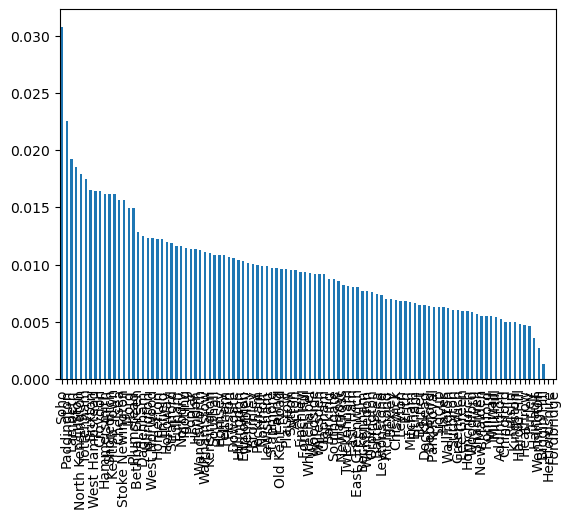

In [22]:
import matplotlib.pyplot as plt
Final_1['DeployedFromStation_Name'].value_counts(normalize=True).plot(kind='bar')
plt.show;

In [23]:
Final_1['IncidentStationGround']=Final_1['IncidentStationGround'].replace(['Acton','Addington','Barking','Barnet','Battersea',
                                                                          'Beckenham','Bethnal Green','Bexley',
                                                                           'Beyond Home Counties','Biggin Hill','Brixton',
                                                                          'Bromley','Chelsea','Chingford','Chiswick','Clapham',
                                                                          'Croydon','Dagenham','Deptford','Dockhead','Dowgate',
                                                                          'Ealing','East Greenwich','East Ham','Edmonton',
                                                                          'Eltham','Enfield','Erith','Euston','Feltham',
                                                                          'Finchley','Fordbridge','Forest Hill','Fulham',
                                                                          'Greenwich','Hainault','Hammersmith','Harold Hill',
                                                                          'Harrow','Hayes','Heathrow','Hendon','Hertfordshire',
                                                                          'Heston','Hillingdon','Holloway','Homerton',
                                                                            'Hornchurch','Hornsey','Ilford','Islington',
                                                                          'Kensington','Kentish Town','Kingston','Lambeth',
                                                                          'Lee Green','Lewisham','Leyton','Leytonstone',
                                                                          'Mill Hill','Millwall','Mitcham','New Cross',
                                                                          'New Malden','Norbury','North Kensington','Northolt',
                                                                           'Old Kent Road','Orpington','Paddington',
                                                                          'Park Royal','Peckham','Plaistow','Plumstead',
                                                                          'Poplar','Purley','Richmond','Romford','Ruislip',
                                                                          'Shadwell','Shoreditch','Sidcup','Soho','Southall',
                                                                          'Southgate','Stanmore','Stoke Newington','Stratford',
                                                                          'Surbiton','Sutton','Tooting','Tottenham',
                                                                           'Twickenham','Wallington','Walthamstow','Wandsworth',
                                                                          'Wembley','Wennington','West Hampstead','West Norwood',
                                                                          'Whitechapel','Willesden','Wimbledon','Woodford',
                                                                          'Woodside'],
                                                                          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
                                                                           21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,
                                                                          39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,
                                                                          57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,
                                                                          75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,
                                                                          93,94,95,96,97,98,99,100,101,102,103,104,105])

In [24]:
Final_1['DeployedFromStation_Name']=Final_1['DeployedFromStation_Name'].replace(['Acton','Addington','Barking','Barnet','Battersea',
                                                                          'Beckenham','Bethnal Green','Bexley',
                                                                           'Beyond Home Counties','Biggin Hill','Brixton',
                                                                          'Bromley','Chelsea','Chingford','Chiswick','Clapham',
                                                                          'Croydon','Dagenham','Deptford','Dockhead','Dowgate',
                                                                          'Ealing','East Greenwich','East Ham','Edmonton',
                                                                          'Eltham','Enfield','Erith','Euston','Feltham',
                                                                          'Finchley','Fordbridge','Forest Hill','Fulham',
                                                                          'Greenwich','Hainault','Hammersmith','Harold Hill',
                                                                          'Harrow','Hayes','Heathrow','Hendon','Hertfordshire',
                                                                          'Heston','Hillingdon','Holloway','Homerton',
                                                                            'Hornchurch','Hornsey','Ilford','Islington',
                                                                          'Kensington','Kentish Town','Kingston','Lambeth',
                                                                          'Lee Green','Lewisham','Leyton','Leytonstone',
                                                                          'Mill Hill','Millwall','Mitcham','New Cross',
                                                                          'New Malden','Norbury','North Kensington','Northolt',
                                                                           'Old Kent Road','Orpington','Paddington',
                                                                          'Park Royal','Peckham','Plaistow','Plumstead',
                                                                          'Poplar','Purley','Richmond','Romford','Ruislip',
                                                                          'Shadwell','Shoreditch','Sidcup','Soho','Southall',
                                                                          'Southgate','Stanmore','Stoke Newington','Stratford',
                                                                          'Surbiton','Sutton','Tooting','Tottenham',
                                                                           'Twickenham','Wallington','Walthamstow','Wandsworth',
                                                                          'Wembley','Wennington','West Hampstead','West Norwood',
                                                                          'Whitechapel','Willesden','Wimbledon','Woodford',
                                                                          'Woodside'],
                                                                          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
                                                                           21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,
                                                                          39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,
                                                                          57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,
                                                                          75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,
                                                                          93,94,95,96,97,98,99,100,101,102,103,104,105])

In [25]:
from datetime import date
Final_1['Joursem']=Final_1['DateOfCall_bis'].dt.weekday

In [26]:
Final_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359042 entries, 0 to 359041
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IncidentNumber                 359042 non-null  object        
 1   CalYear                        359042 non-null  int64         
 2   HourOfCall                     359042 non-null  int64         
 3   IncidentGroup                  359042 non-null  int64         
 4   StopCodeDescription            359042 non-null  int64         
 5   PropertyCategory               359042 non-null  int64         
 6   AddressQualifier               359042 non-null  int64         
 7   ProperCase                     359042 non-null  int64         
 8   Easting_rounded                359042 non-null  int64         
 9   Northing_rounded               359042 non-null  int64         
 10  IncidentStationGround          359041 non-null  float64       
 11  

In [27]:
Calendrier=pd.read_csv(r"C:\Users\agrabia\Documents\Formation\Projet/London_Pompyer_Calendrier.csv", sep=';')
Calendrier['DateOfCall_bis'] = pd.to_datetime(Calendrier['DateOfCall_bis'])

C:\Users\agrabia\AppData\Local\Temp\ipykernel_10668\1042827561.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Calendrier['DateOfCall_bis'] = pd.to_datetime(Calendrier['DateOfCall_bis'])


In [28]:
Calendrier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DateOfCall_bis            1247 non-null   datetime64[ns]
 1   jour ferie                1247 non-null   int64         
 2   vacances                  1247 non-null   int64         
 3   COVID (fermeture ecoles)  1247 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 39.1 KB


In [29]:
Final_1b=Final_1.merge(right=Calendrier, on='DateOfCall_bis')
Final_1b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348684 entries, 0 to 348683
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   IncidentNumber                 348684 non-null  object        
 1   CalYear                        348684 non-null  int64         
 2   HourOfCall                     348684 non-null  int64         
 3   IncidentGroup                  348684 non-null  int64         
 4   StopCodeDescription            348684 non-null  int64         
 5   PropertyCategory               348684 non-null  int64         
 6   AddressQualifier               348684 non-null  int64         
 7   ProperCase                     348684 non-null  int64         
 8   Easting_rounded                348684 non-null  int64         
 9   Northing_rounded               348684 non-null  int64         
 10  IncidentStationGround          348683 non-null  float64       
 11  

In [30]:
Final_1b.corr()

C:\Users\agrabia\AppData\Local\Temp\ipykernel_10668\3485642814.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Final_1b.corr()


,CalYear,HourOfCall,IncidentGroup,StopCodeDescription,PropertyCategory,AddressQualifier,ProperCase,Easting_rounded,Northing_rounded,IncidentStationGround,...,TravelTimeSeconds,AttendanceTimeSeconds,DeployedFromStation_Name,MinuteOfCall,DelayCodeId_bis,AFA,Joursem,jour ferie,vacances,COVID (fermeture ecoles)
CalYear,1.000000,-0.010685,0.034699,0.028028,-0.022135,0.008486,-0.002730,-0.004186,-0.007331,-0.000609,...,0.045924,0.040981,-0.000102,-0.001406,-0.006112,-0.004040,-0.002211,0.007492,-0.027794,-0.081535
HourOfCall,-0.010685,1.000000,0.015083,0.028187,0.015744,0.013619,-0.007088,0.003663,-0.003330,-0.005128,...,0.033247,-0.032722,-0.003519,-0.006239,-0.003442,-0.063946,-0.002369,-0.003897,-0.001047,-0.004981
IncidentGroup,0.034699,0.015083,1.000000,0.984193,0.155053,-0.027577,-0.042593,0.059077,0.025736,-0.006454,...,0.069440,0.067995,-0.006407,0.002725,-0.038234,-0.738758,0.031702,0.009864,0.011979,-0.005595
StopCodeDescription,0.028028,0.028187,0.984193,1.000000,0.216553,-0.013358,-0.049560,0.066951,0.027382,-0.007451,...,0.080467,0.078947,-0.006831,0.003309,-0.049786,-0.822270,0.034985,0.010689,0.014371,-0.007148
PropertyCategory,-0.022135,0.015744,0.155053,0.216553,1.000000,0.071456,-0.046624,0.033530,-0.000964,-0.011598,...,0.076254,0.070465,-0.009597,-0.001021,-0.098795,-0.257170,0.006563,-0.002684,0.008996,-0.009293
AddressQualifier,0.008486,0.013619,-0.027577,-0.013358,0.071456,1.000000,-0.048614,-0.026724,0.017280,-0.012550,...,0.033001,0.036318,-0.012297,0.000496,-0.021455,-0.000017,-0.001644,-0.000713,0.004112,-0.001087
ProperCase,-0.002730,-0.007088,-0.042593,-0.049560,-0.046624,-0.048614,1.000000,-0.018645,-0.139894,0.205551,...,-0.089884,-0.092798,0.169692,-0.000375,0.024100,0.061970,-0.004172,-0.000681,-0.003197,0.004713
Easting_rounded,-0.004186,0.003663,0.059077,0.066951,0.033530,-0.026724,-0.018645,1.000000,0.044738,-0.122296,...,-0.027613,-0.025810,-0.111793,0.003010,0.002392,-0.078113,0.001709,-0.000067,0.005219,0.000278
Northing_rounded,-0.007331,-0.003330,0.025736,0.027382,-0.000964,0.017280,-0.139894,0.044738,1.000000,0.002172,...,0.043350,0.038651,0.014660,0.000090,-0.022890,-0.027021,0.005915,-0.002021,0.001497,0.000806
IncidentStationGround,-0.000609,-0.005128,-0.006454,-0.007451,-0.011598,-0.012550,0.205551,-0.122296,0.002172,1.000000,...,0.012135,0.015418,0.752826,-0.002507,-0.015519,0.011131,-0.000237,-0.000609,-0.004050,-0.000031


C:\Users\agrabia\AppData\Local\Temp\ipykernel_10668\346530452.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Final_1b.corr(),annot=True,cmap='RdBu_r',center=0);


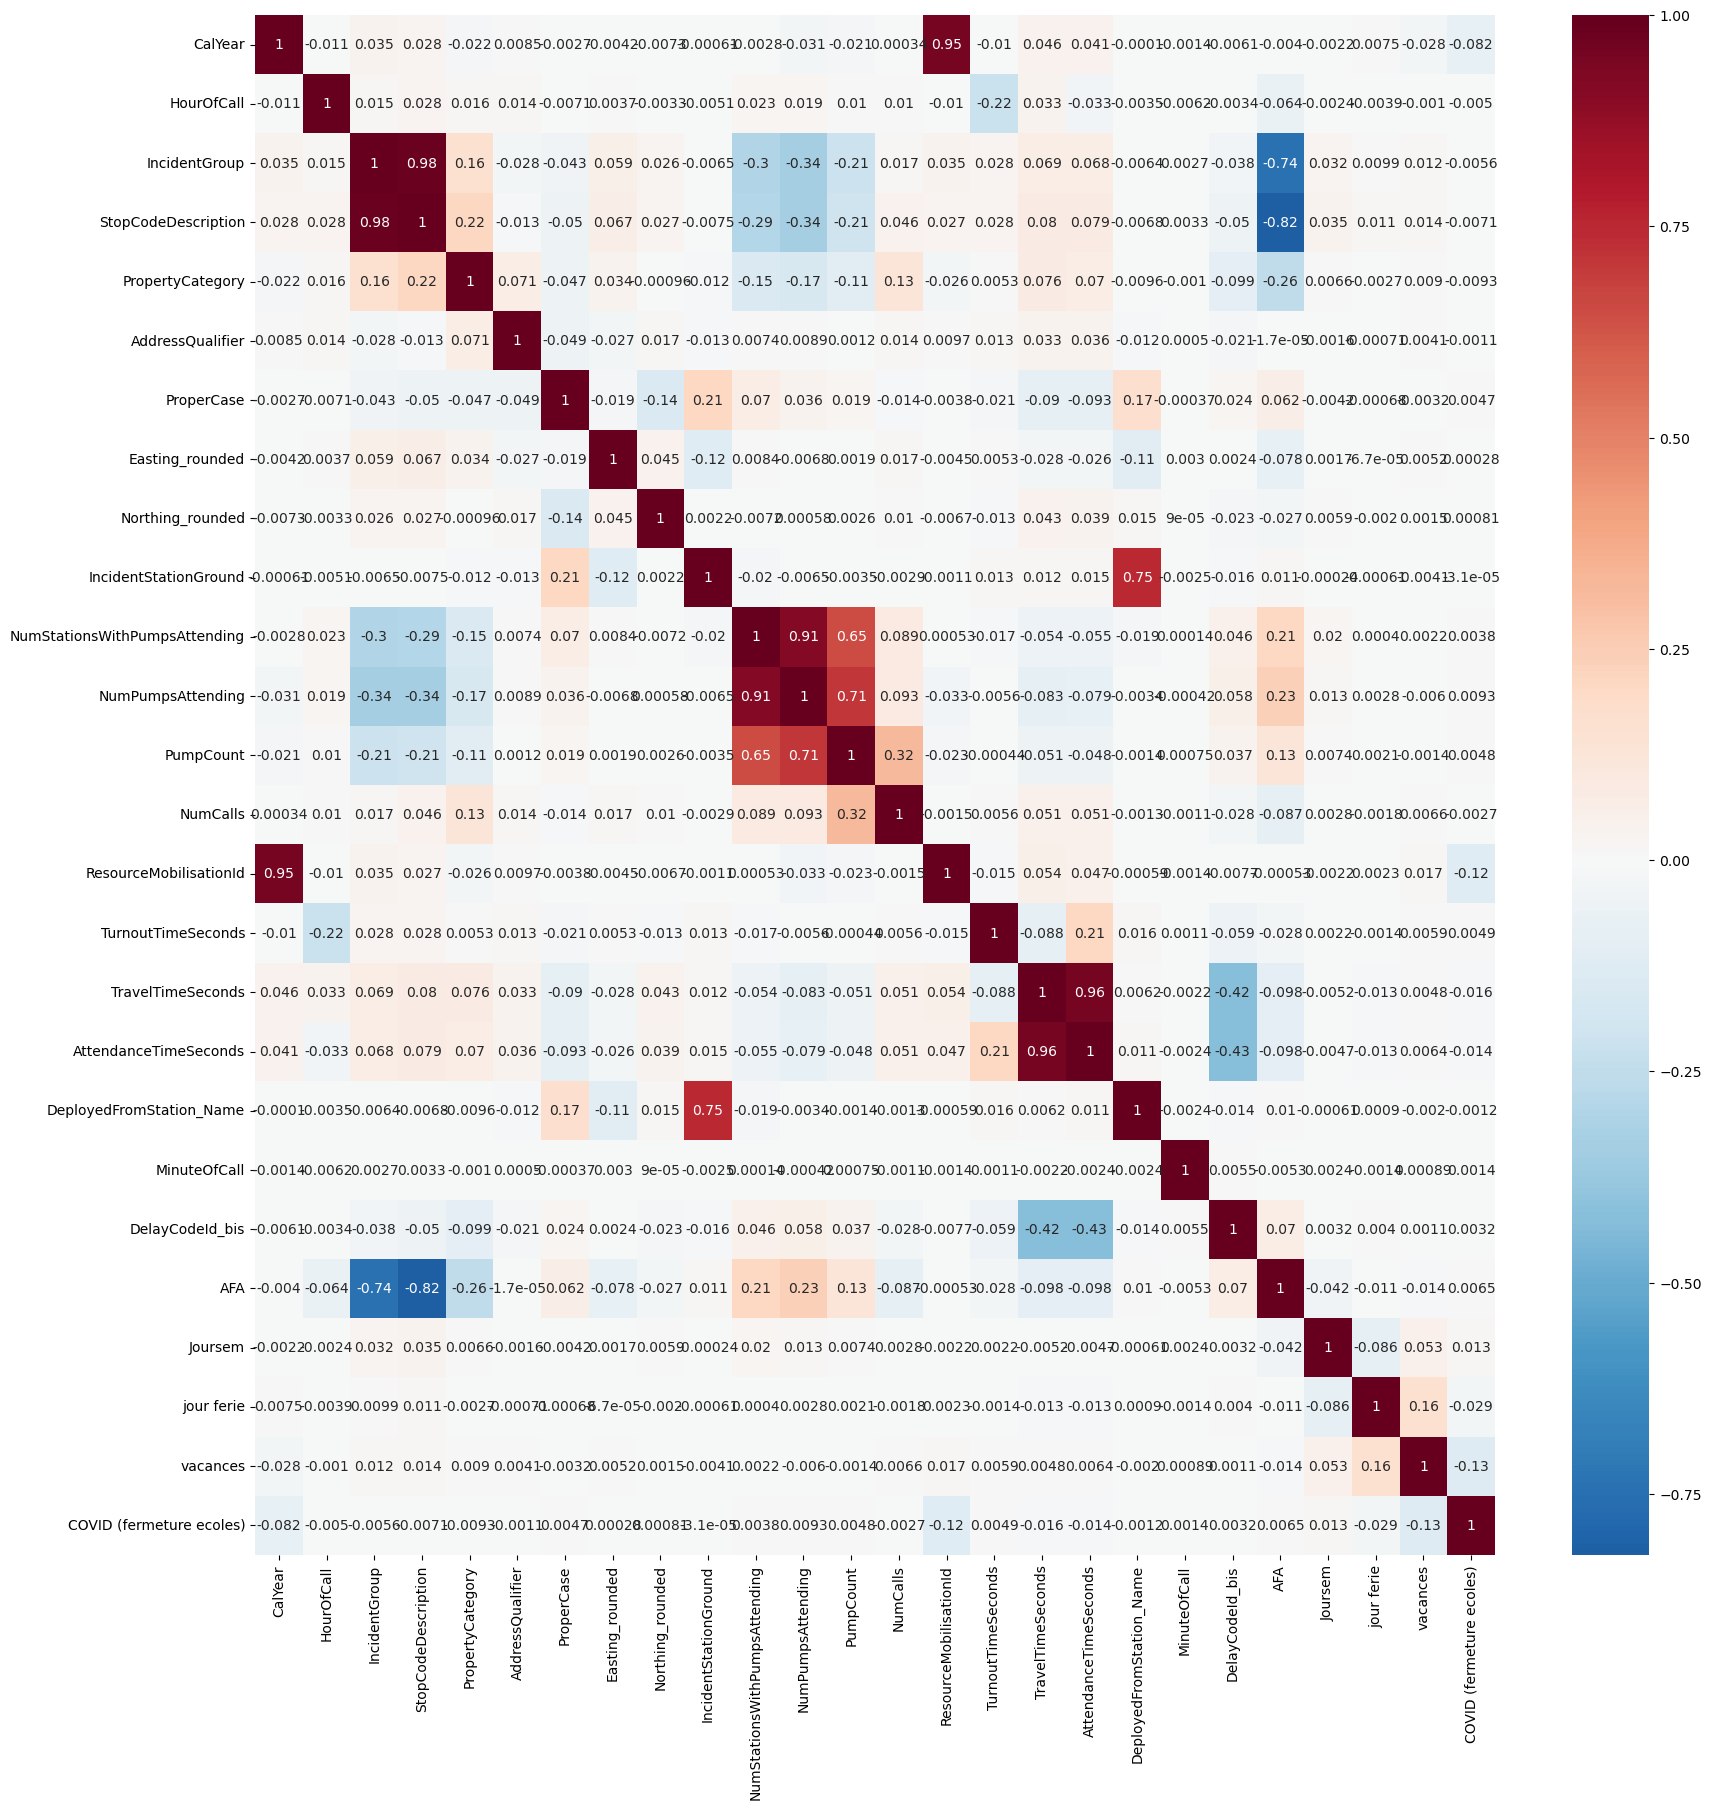

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(Final_1b.corr(),annot=True,cmap='RdBu_r',center=0);

In [32]:
Final_1b.to_csv (r"C:\Users\agrabia\Documents\Formation\Projet/Final_1b.csv", index = False, header=True)